<a href="https://colab.research.google.com/github/claudio-ds/RepositorioProfissional/blob/main/Relatorio_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição**

Avaliar a performance das operações em Day Trade de Dólar Futuro e responder os seguintes questionamentos:



1.   Qual foi o Lado com maior número de operações?.
2.   Qual foi o melhor horário para operar?.

1.   Quanto tempo posicionado nas operações ganhadoras?.
2.   Quanto tempo posicionado nas operações perdedoras?.




**Importando as bibliotecas para análise.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import time

import warnings
warnings.filterwarnings('ignore')

**Definição dos parâmetros do Plano de Trade.**

In [2]:
capital = 4000
meta_diaria = 120
meta_mensal = 960
lockout_diario = 180
lockout_semanal = 540
lockout_mensal = 810
lote = 2
mgpo = 5
mspo = 36

**Executando carregamento do dataset para análise.**

In [3]:
base = pd.read_csv('/content/relatorioPerformanceMarco3.csv', sep=';')
base

,Ativo,Data,Horario,Tempo Operacao,Qtd Compra,Qtd Venda,Lado,Preco Compra,Preco Venda,Preco de Mercado,Resultado,Resultado(%),Total
0,WDOJ21,01/03/2021,10,36s,1,1,V,"5601,50","5601,00","5.774,00",-5,"-0,5","-5,00"
1,WDOJ21,01/03/2021,11,4s,1,1,C,"5581,00","5581,50","5.774,00",5,"0,5",R$ -
2,WDOJ21,02/03/2021,9,5s,1,1,V,"5677,00","5677,50","5.774,00",5,"0,5","5,00"
3,WDOJ21,02/03/2021,9,8s,1,1,V,"5681,50","5682,00","5.774,00",5,"0,5","10,00"
4,WDOJ21,02/03/2021,12,4s,1,1,V,"5719,50","5720,00","5.774,00",5,"0,5","15,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,WDOJ21,29/03/2021,9,9s,1,1,C,"5767,50","5766,50","5.774,00",-10,-1,"-295,00"
63,WDOJ21,29/03/2021,9,2s,1,1,V,"5772,50","5774,00","5.774,00",15,"1,5","-280,00"
64,WDOJ21,29/03/2021,11,-,1,1,V,"5799,00","5798,00","5.774,00",-10,-1,"-290,00"
65,WDOJ21,29/03/2021,15,1s,1,1,V,"5779,00","5777,00","5.774,00",-20,-2,"-310,00"


**Visualizando o tamanho do dataset.**

In [4]:
base.shape

(67, 13)

**Visualizando o tipo dos dados no datatset.**

In [5]:
base.dtypes

Ativo               object
Data                object
Horario              int64
Tempo Operacao      object
Qtd Compra           int64
Qtd Venda            int64
Lado                object
 Preco Compra       object
 Preco Venda        object
Preco de Mercado    object
 Resultado           int64
Resultado(%)        object
 Total              object
dtype: object

**Verificando se há valores nulos no dataset.**

In [6]:
base.isnull().sum()

Ativo               0
Data                0
Horario             0
Tempo Operacao      0
Qtd Compra          0
Qtd Venda           0
Lado                0
 Preco Compra       0
 Preco Venda        0
Preco de Mercado    0
 Resultado          0
Resultado(%)        0
 Total              0
dtype: int64

**Renomeando as variáveis.**

In [7]:
base.columns=['Ativo', 'Data', 'Horario', 'Tempo_Operacao','Qtd_Compra','Qtd_Venda','Lado','Preco_Compra','Preco_Venda','Preco_Mercado','Resultado','Resultado(%)','Total']

**Visualizando as primeiras linhas do dataset.**

In [8]:
base.head()

,Ativo,Data,Horario,Tempo_Operacao,Qtd_Compra,Qtd_Venda,Lado,Preco_Compra,Preco_Venda,Preco_Mercado,Resultado,Resultado(%),Total
0,WDOJ21,01/03/2021,10,36s,1,1,V,"5601,50","5601,00","5.774,00",-5,"-0,5","-5,00"
1,WDOJ21,01/03/2021,11,4s,1,1,C,"5581,00","5581,50","5.774,00",5,"0,5",R$ -
2,WDOJ21,02/03/2021,9,5s,1,1,V,"5677,00","5677,50","5.774,00",5,"0,5","5,00"
3,WDOJ21,02/03/2021,9,8s,1,1,V,"5681,50","5682,00","5.774,00",5,"0,5","10,00"
4,WDOJ21,02/03/2021,12,4s,1,1,V,"5719,50","5720,00","5.774,00",5,"0,5","15,00"


**Executando agrupamento da coluna "Lado", que indica a quantidade de operações de Compra e de Venda.**

In [9]:
lado_agrupado = base.groupby(base['Lado']).size()
lado_agrupado

Lado
C    46
V    21
dtype: int64

**Visualização do "lado_agrupado" através de um gráfico de barras.**

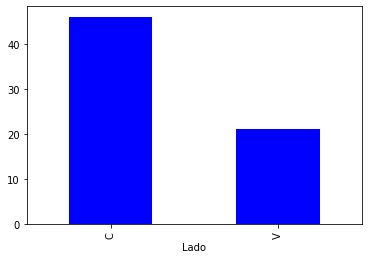

In [10]:
lado_agrupado.plot.bar(['Lado'], color='blue')

**Executando agrupamento da coluna "Data", que indica a quantidade de operações por dia.**

In [11]:
data_agrupada = base.groupby(['Data']).size()
data_agrupada

Data
01/03/2021    2
02/03/2021    4
03/03/2021    7
04/03/2021    6
05/03/2021    1
08/03/2021    1
09/03/2021    8
10/03/2021    2
11/03/2021    2
12/03/2021    1
15/03/2021    2
16/03/2021    3
17/03/2021    1
18/03/2021    1
19/03/2021    2
22/03/2021    7
23/03/2021    2
24/03/2021    2
25/03/2021    3
26/03/2021    3
29/03/2021    6
30/03/2021    1
dtype: int64

**Cálculo do total de operações dentro do mês.**

In [12]:
print(f"Total de operações no mês: {data_agrupada.sum()}")

Total de operações no mês: 67


**Visualização da "data_agrupada" através de um gráfico de barras.**

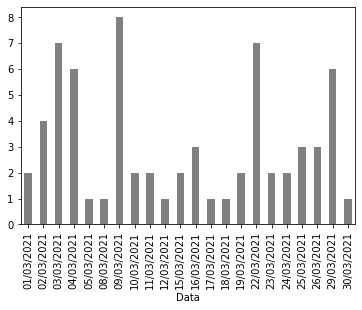

In [13]:
data_agrupada.plot.bar(['Data'], color='gray')

**Cálculo da média de operações por dia.**

In [14]:
media = data_agrupada.mean()
print(f"Média total de operações por dia: {media:.2f}")

Média total de operações por dia: 3.05


**Executando agrupamento da coluna "Horario", que indica a quantidade de operações por faixa horária.**

In [15]:
horario_agrupado = base.groupby(['Horario']).size()
horario_agrupado

Horario
9     21
10    20
11    11
12    10
13     1
14     2
15     2
dtype: int64

**Visualização do "horario_agrupado" através de um gráfico de barras.**

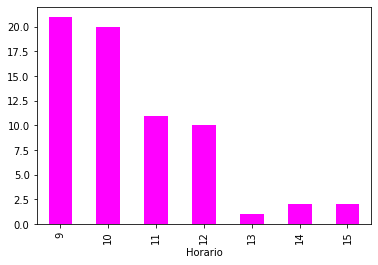

In [16]:
horario_agrupado.plot.bar(['Horario'], color='magenta')

**Executando agrupamento da coluna "tempo_operação", que indica o tempo posicionado em cada operação.**

In [17]:
tempo_agrupado = base.groupby(['Tempo_Operacao']).size()
tempo_agrupado

Tempo_Operacao
-           2
10s         3
11min56s    1
11s         4
12s         1
13s         2
14s         1
15s         2
16s         1
1min14s     1
1min16s     1
1min2s      1
1min34s     1
1min36s     1
1min4s      1
1min6s      1
1s          2
20s         1
23s         3
26s         1
27s         2
2min10s     1
2min8s      1
2s          3
32s         1
36s         1
3min19s     2
3s          3
49s         1
4min12s     1
4s          7
5s          2
6s          3
7s          1
8s          3
9min48s     1
9s          3
dtype: int64

**Cálculo da média do tempo_operação.**

In [18]:
media_tempo_agrupado = tempo_agrupado.mean()
media_tempo_agrupado

1.8108108108108107

**Cálculo da média do tempo_operação convertido.**

In [19]:
media_tempo_agrupado_convertido = time.strftime("%H:%M:%S", time.gmtime(.01810*3600))
media_tempo_agrupado_convertido

'00:01:05'

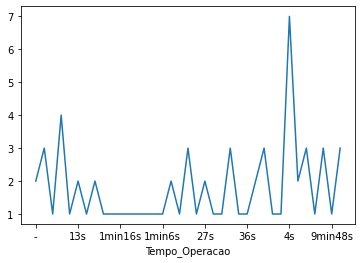

In [20]:
tempo_agrupado.plot.line()

**Executando agrupamento da coluna "resultado", que indica os valores positivos e negativos.**

In [21]:
res = base.groupby(base['Resultado']).size()
res

Resultado
-195     1
-135     1
-125     1
-90      1
-50      1
-30      1
-20      4
-15      2
-10      4
-5       3
 0       2
 5      21
 10      7
 15     14
 20      1
 25      1
 30      2
dtype: int64

**Calculando as operações positivas.**

In [22]:
valor_trade_p = pd.array([0,5,10,15,20,25,30], dtype=int)
quant_trade_p = pd.array([2,21,7,14,1,1,2], dtype=int)
resultado_positivo = valor_trade_p * quant_trade_p 
res_positivo = resultado_positivo.sum()
print(f'Valor total das operações com Lucro R$ {res_positivo:.2f}')

Valor total das operações com Lucro R$ 490.00


**Visualização das "operações com lucro" através de um gráfico de barras.**

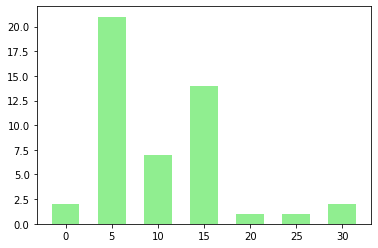

In [23]:
plt.bar(valor_trade_p,quant_trade_p, width=3, color='lightgreen')
plt.show()

**Calculando as operações negativas.**

In [24]:
valor_trade_n = pd.array([-195,-135,-125,-90,-50,-30,-20,-15,-10,-5], dtype=int)
quant_trade_n = pd.array([1,1,1,1,1,1,4,2,4,3], dtype=int)
resultado_negativo = valor_trade_n * quant_trade_n
res_negativo = resultado_negativo.sum()
print(f'Valor total das operações com prejuízo R$ {res_negativo:.2f}')

Valor total das operações com prejuízo R$ -790.00


**Visualização das "operações com prejuízo" através de um gráfico de barras.**

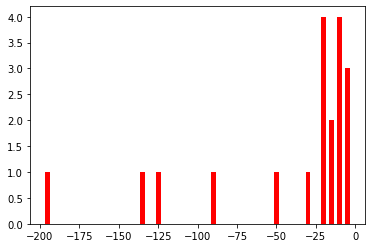

In [25]:
plt.bar(valor_trade_n,quant_trade_n, width=3, color='red')
plt.show()

**Conclusão:**


1.   Nas operações a minha percpeção estava com viés de Compra, por isso atuei mais na compra do que na Venda.

2.   O horário onde aprareceram mais oportunidades foi das 9:00 
á 12:00.

1.   As melhores operações foram com o tempo posicionado abaixo dos 20 segundos.

2.   As piores operações foram com tempo superior a 120 segundos, quando tentei segurar a posição quando deveria realizar o prejuízo mais cedo. O que obviamente comprometeu a performance dentro do mês.



